In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


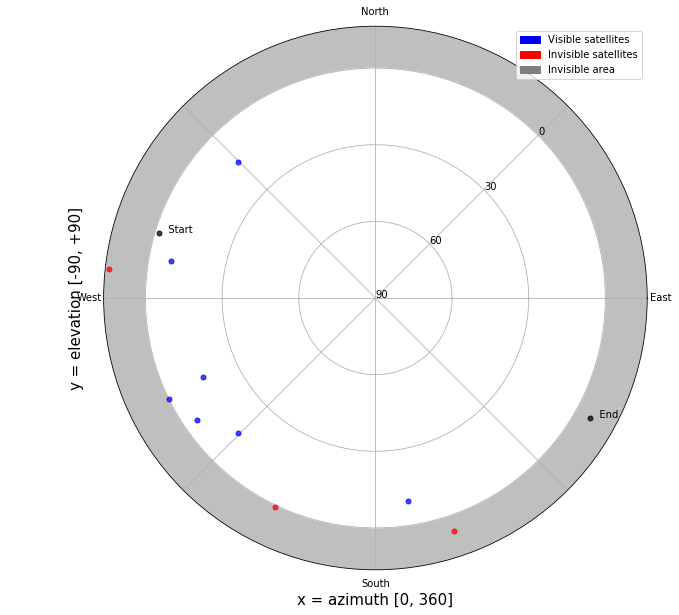

In [3]:
from tracker import plotter

n = 12
az = np.random.uniform(size=n) * 360.0
el = np.random.uniform(low=-1.0, high=1.0, size=n) * 20

plotter.plot_az_el(az, el)
plt.show()

In [4]:
from tracker.tle_getter import get_tle

OBS_LAT = -15.989620
OBS_LON = -48.044411
OBS_ALT = 500 # meters


ISS_TLE = ('1 25544U 98067A   18264.87214538 -.00000479 +00000-0 +00000-0 0 9990',
           '2 25544 051.6411 256.8919 0004651 185.2142 246.8508 15.53744581133552')
ISS_TLE = get_tle(name='ISS')
print('ISS_TLE = {}'.format(ISS_TLE))

ISS_TLE = ('1 25544U 98067A   18299.60837288  .00001270  00000-0  26663-4 0  9998', '2 25544  51.6408  83.8085 0004026 339.1261 124.1824 15.53864825138950')


In [5]:
from tracker.satellite import Satellite
from datetime import datetime, timezone

iss = Satellite(ISS_TLE[0], ISS_TLE[1])
utc_satview = datetime(year=2018,
                       month=10,
                       day=10,
                       hour=22,
                       minute=1,
                       second=35,
                       tzinfo=timezone.utc)

iss_position, v = iss.propagate(utc_satview)

print('iss_position = {}'.format(iss_position))
b = (768350.0713588104, 6538760.196343955, -1632694.711713458)

print(iss_position == b)

iss_position = (1524070.2521822436, -4512402.142261064, 4825612.974270211)
False


In [6]:
def get_row(satview_az, satview_el, sat, lat, lon, alt, date):
    az, el = sat.get_observer_azimuth_elevation(lat, lon, alt, date=date)
    return [satview_az, satview_el, az, el, date]

In [7]:
rows = []

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=3,
                       second=58,
                       tzinfo=timezone.utc)
rows.append(get_row(137.88, -44.77, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=46,
                       second=34,
                       tzinfo=timezone.utc)
rows.append(get_row(317.97, -51.94, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=51,
                       second=13,
                       tzinfo=timezone.utc)
rows.append(get_row(313.60, -43.08, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=52,
                       second=53,
                       tzinfo=timezone.utc)
rows.append(get_row(311.97, -39.89, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

utc_satview_date = datetime(year=2018,
                       month=10,
                       day=20,
                       hour=22,
                       minute=55,
                       second=27,
                       tzinfo=timezone.utc)
rows.append(get_row(309.25, -34.94, iss, OBS_LAT, OBS_LON, OBS_ALT, utc_satview_date))

In [8]:

df_comparison = pd.DataFrame(rows, columns=['SatView azimuth', 'SatView elevation', 'Calculated azimuth', 'Calculated elevation', 'Date'])
df_comparison['Azimuth error'] = (df_comparison['SatView azimuth'] - df_comparison['Calculated azimuth']).abs()
df_comparison['Elevation error'] = (df_comparison['SatView elevation'] - df_comparison['Calculated elevation']).abs()
column_order = ['SatView azimuth', 'SatView elevation', 'Calculated azimuth',
       'Calculated elevation', 'Azimuth error', 'Elevation error', 'Date', ]

df_comparison = df_comparison[column_order]
display(df_comparison)
pd.options.display.float_format = '${:,.2f}'.format

values = df_comparison.values

,SatView azimuth,SatView elevation,Calculated azimuth,Calculated elevation,Azimuth error,Elevation error,Date
0,137.88,-44.77,137.378829,-45.214270,0.501171,0.444270,2018-10-20 22:03:58+00:00
1,317.97,-51.94,317.442218,-52.439236,0.527782,0.499236,2018-10-20 22:46:34+00:00
2,313.60,-43.08,313.083086,-43.572215,0.516914,0.492215,2018-10-20 22:51:13+00:00
3,311.97,-39.89,311.445839,-40.373338,0.524161,0.483338,2018-10-20 22:52:53+00:00
4,309.25,-34.94,308.735555,-35.418929,0.514445,0.478929,2018-10-20 22:55:27+00:00


In [9]:
def dataframe_to_latex(df):
    values = df.values
    for r in values:
        for i, x in enumerate(r):
            if i > 0:
                print(' & ', end='')
            if isinstance(x, datetime):
                print(x.strftime('%d/%m/%Y %H:%M:%S'), end='')
            else:
                print('{:.2f}'.format(x), end='')
        print(' \\\\ \\hline')
dataframe_to_latex(df_comparison)

137.88 & -44.77 & 137.38 & -45.21 & 0.50 & 0.44 & 20/10/2018 22:03:58 \\ \hline
317.97 & -51.94 & 317.44 & -52.44 & 0.53 & 0.50 & 20/10/2018 22:46:34 \\ \hline
313.60 & -43.08 & 313.08 & -43.57 & 0.52 & 0.49 & 20/10/2018 22:51:13 \\ \hline
311.97 & -39.89 & 311.45 & -40.37 & 0.52 & 0.48 & 20/10/2018 22:52:53 \\ \hline
309.25 & -34.94 & 308.74 & -35.42 & 0.51 & 0.48 & 20/10/2018 22:55:27 \\ \hline


# Erro médio

In [10]:
df_err = df_comparison[['Azimuth error', 'Elevation error']].describe()
df_err.drop(['count', 'min', '25%', '50%', '75%'], inplace=True)
display(df_err)

,Azimuth error,Elevation error
mean,$0.52,$0.48
std,$0.01,$0.02
max,$0.53,$0.50


Step = 2
plotted points between [2018-10-01 14:57:00+00:00] and [2018-10-01 15:30:18+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


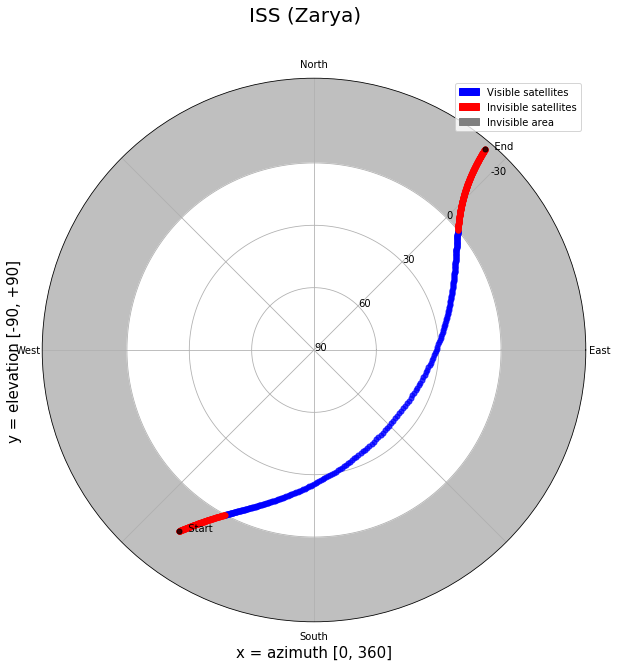

,Azimuth,Elevation,Date
0,$216.78,$-18.84,2018-10-01 14:57:00+00:00
1,$216.76,$-18.77,2018-10-01 14:57:02+00:00
2,$216.74,$-18.70,2018-10-01 14:57:04+00:00
3,$216.71,$-18.62,2018-10-01 14:57:06+00:00
4,$216.69,$-18.55,2018-10-01 14:57:08+00:00
5,$216.67,$-18.47,2018-10-01 14:57:10+00:00
6,$216.64,$-18.40,2018-10-01 14:57:12+00:00
7,$216.62,$-18.33,2018-10-01 14:57:14+00:00
8,$216.59,$-18.25,2018-10-01 14:57:16+00:00
9,$216.57,$-18.18,2018-10-01 14:57:18+00:00


In [11]:
from datetime import timedelta

start = datetime(year=2018,
                 month=10,
                 day=1,
                 hour=11,
                 minute=57,
                 second=0,
                 tzinfo=timezone.utc)
start += timedelta(hours=3)

end = start + timedelta(seconds=2000)
df = plotter.see_satellite(iss, OBS_LAT, OBS_LON, OBS_ALT, start=start, end=end, count=1000, annotate=False, title='ISS (Zarya)')
plt.show()
display(df)

Step = 1
plotted points between [2018-10-30 17:40:00+00:00] and [2018-10-30 18:40:00+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


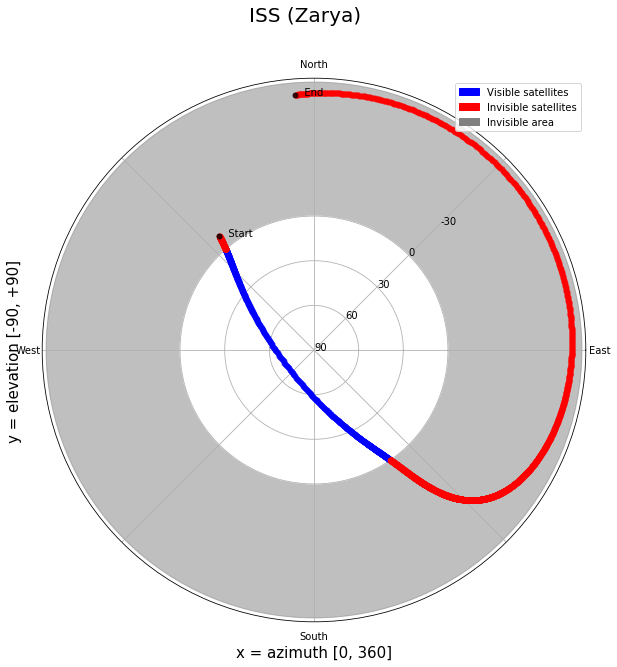

,Azimuth,Elevation,Date
0,$320.25,$-9.34,2018-10-30 17:40:00+00:00
1,$320.24,$-9.29,2018-10-30 17:40:01+00:00
2,$320.24,$-9.25,2018-10-30 17:40:02+00:00
3,$320.23,$-9.20,2018-10-30 17:40:03+00:00
4,$320.23,$-9.16,2018-10-30 17:40:04+00:00
5,$320.22,$-9.11,2018-10-30 17:40:05+00:00
6,$320.22,$-9.07,2018-10-30 17:40:06+00:00
7,$320.21,$-9.02,2018-10-30 17:40:07+00:00
8,$320.21,$-8.98,2018-10-30 17:40:08+00:00
9,$320.20,$-8.93,2018-10-30 17:40:09+00:00


In [12]:
from datetime import timedelta

start = datetime(year=2018,
                 month=10,
                 day=30,
                 hour=14,
                 minute=40,
                 second=0,
                 tzinfo=timezone.utc)
start += timedelta(hours=3)

end = start + timedelta(seconds=3600)
df = plotter.see_satellite(iss, OBS_LAT, OBS_LON, OBS_ALT, start=start, end=end, count=10000, annotate=False, title='ISS (Zarya)')
plt.show()
display(df)

2018-10-27 04:07:03+00:00
Step = 86
plotted points between [2018-10-26 04:07:03+00:00] and [2018-10-27 03:58:57+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


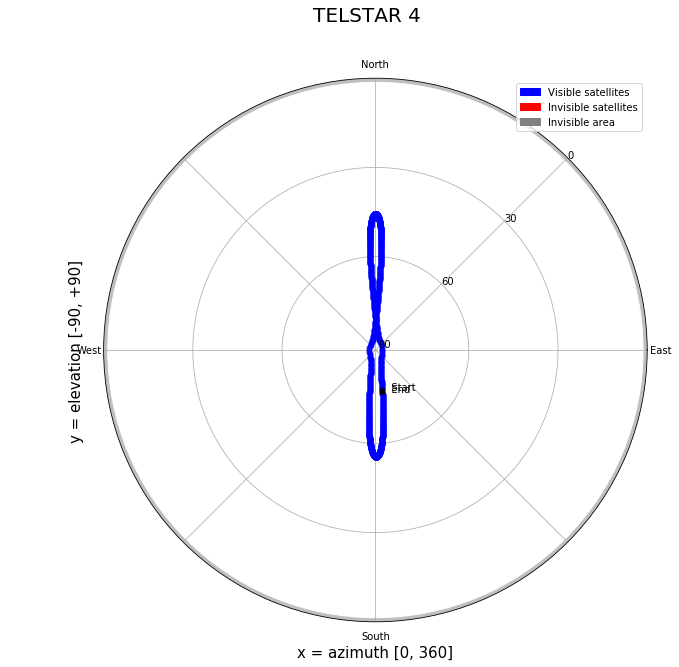

,Azimuth,Elevation,Date
0,$170.70,$77.68,2018-10-26 04:07:03+00:00
1,$170.59,$77.93,2018-10-26 04:08:29+00:00
2,$170.47,$78.17,2018-10-26 04:09:55+00:00
3,$170.35,$78.41,2018-10-26 04:11:21+00:00
4,$170.23,$78.66,2018-10-26 04:12:47+00:00


In [13]:
def plot_sat(name, tle1, tle2, obs_lat, obs_lon, obs_alt, start=None, end=None):
    if start is None:
        start = datetime.now(timezone.utc)
        print(start)
    if end is None:
        end = start + timedelta(seconds=3600 * 24)
        print(end)
    
    sat = Satellite(tle1, tle2)
    df = plotter.see_satellite(sat, obs_lat, obs_lon, obs_alt, start=start, end=end, count=1000, annotate=False, title=name)
    plt.show()
    display(df.head())
    
start = datetime(year=2018,
                 month=10,
                 day=26,
                 hour=4,
                 minute=7,
                 second=3,
                 tzinfo=timezone.utc)

plot_sat('TELSTAR 4',
         '1 23670U 95049A   18297.32130323 -.00000194 +00000-0 +00000-0 0  9994',
         '2 23670 011.3140 032.7443 0005992 252.2037 133.9454 01.00279297084502',
         -1.752453,
         -89.445483,
         2.5 * 10**7,
         start=start)

Step = 10
plotted points between [2018-09-25 17:25:40+00:00] and [2018-09-25 20:12:10+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


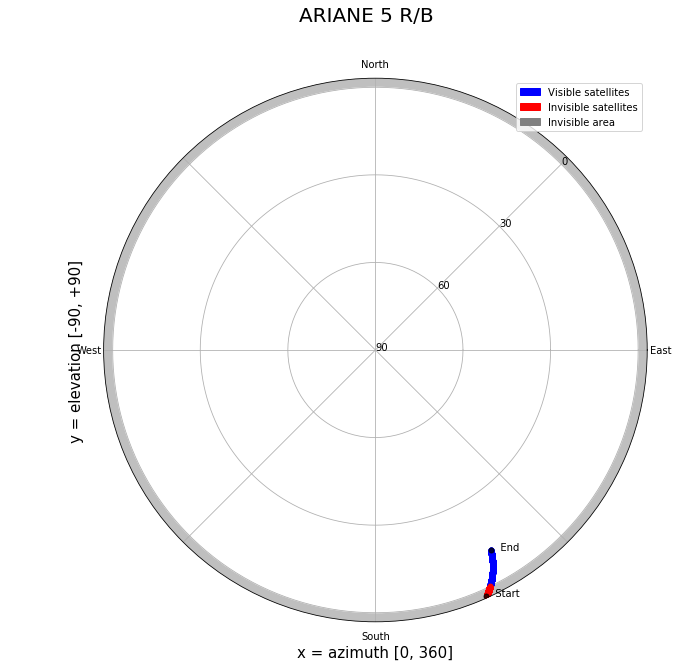

,Azimuth,Elevation,Date
0,$155.69,$-2.44,2018-09-25 17:25:40+00:00
1,$155.68,$-2.43,2018-09-25 17:25:50+00:00
2,$155.68,$-2.42,2018-09-25 17:26:00+00:00
3,$155.67,$-2.40,2018-09-25 17:26:10+00:00
4,$155.66,$-2.39,2018-09-25 17:26:20+00:00


In [14]:
start = datetime(year=2018,
                 month=9,
                 day=25,
                 hour=17,
                 minute=25,
                 second=40,
                 tzinfo=timezone.utc)
end = start + timedelta(hours=3)

plot_sat('ARIANE 5 R/B',
         '1 25990U 99066B   18263.95148864 -.00000062  00000-0  00000+0 0  9998',
         '2 25990  61.8726  65.7628 7857263  80.4884   0.5357  0.55293909 25729',
         -15.995,
         -48.047,
         1201,
         start=start,
         end=end)

telstar4_az, telstar4_el, telstar4_at = get_az_el(-1.752453, -89.445483, 0, name='TELSTAR4', seconds=10)
print(telstar4_el)
telstar4_points = pd.DataFrame({'TELSTAR4-402R azimuth': telstar4_az,
                                'TELSTAR4-402R elevation': telstar4_el,
                                'TELSTAR4-402R dates': telstar4_at,})
display(telstar4_points.head())

In [15]:
def degrees_error(deg1, deg2):
    err = abs(deg1 - deg2)
    if err > 180.0:
        err = 360.0 - err
    return err

telstar402r_tle = get_tle(name='TELSTAR4')
telstar = Satellite(*telstar402r_tle)
az_errors = []
el_errors = []

for i in range(len(telstar4_az)):
    az, el = telstar.get_observer_azimuth_elevation(-1.752453, -89.445483, 0, date = telstar4_at[i])
    az_errors.append(degrees_error(az, telstar4_az[i]))
    el_errors.append(degrees_error(el, telstar4_el[i]))

telstar_errors = pd.DataFrame({'azimuth': az_errors, 'elevation': el_errors})
display(telstar_errors.head())

display(telstar_errors.describe())

start = datetime(year=2018,
                 month=9,
                 day=25,
                 hour=17,
                 minute=25,
                 second=40,
                 tzinfo=timezone.utc)
end = start + timedelta(hours=2)

plot_sat('TELSTAR4-402R',
         *telstar402r_tle,
         -1.752453,
         -89.445483,
         0,
         start=telstar4_at[0],
         end=telstar4_at[-1])

Step = 18
plotted points between [2018-10-26 06:25:41+00:00] and [2018-10-26 11:25:23+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


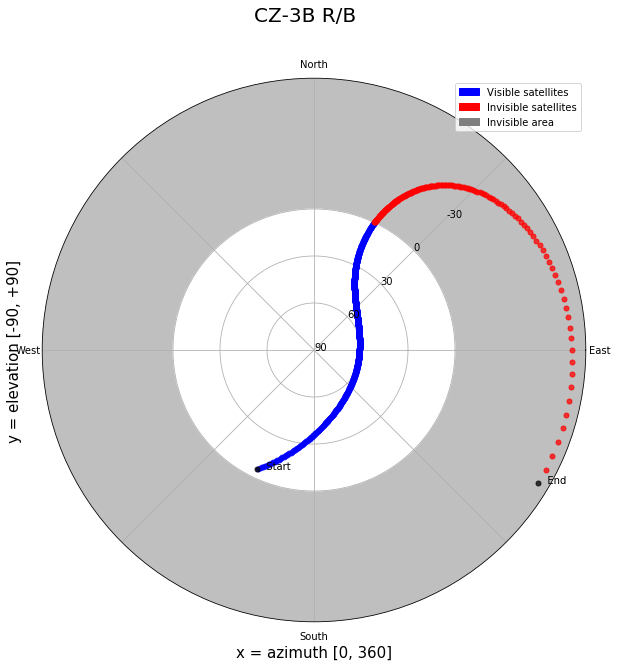

,Azimuth,Elevation,Date
0,$205.64,$5.68,2018-10-26 06:25:41+00:00
1,$205.12,$6.44,2018-10-26 06:25:59+00:00
2,$204.60,$7.20,2018-10-26 06:26:17+00:00
3,$204.09,$7.96,2018-10-26 06:26:35+00:00
4,$203.57,$8.70,2018-10-26 06:26:53+00:00


In [16]:
cz3b_id = 43624
cz3b_tle = get_tle(norad_id=cz3b_id)

start = datetime(year=2018,
                 month=10,
                 day=26,
                 hour=6,
                 minute=25,
                 second=41,
                 tzinfo=timezone.utc)

end = datetime(year=2018,
                 month=10,
                 day=26,
                 hour=11,
                 minute=25,
                 second=41,
                 tzinfo=timezone.utc)

plot_sat('CZ-3B R/B',
         *cz3b_tle,
         -15.989620,
         -48.044411,
         500,
         start=start,
         end=end)

## MOLNIYA_tle = '1  7780U 75036A   18298.33825125 -.00000367 +00000-0 +78518-4 0  9990', '2  7780 062.1056 050.8484 7484959 281.3216 010.3622 02.00630401318914'


start = datetime(year=2018,
                 month=11,
                 day=26,
                 hour=5,
                 minute=40,
                 second=00,
                 tzinfo=timezone.utc)

end = datetime(year=2018,
                 month=11,
                 day=26,
                 hour=17,
                 minute=39,
                 second=48,
                 tzinfo=timezone.utc)

plot_sat('MOLNIYA 1-29',
         *MOLNIYA_tle,
         25.0,
         -90.960318,
         595,
         start=start,
         end=end)

Step = 86
plotted points between [2018-10-24 00:00:00+00:00] and [2018-10-24 23:51:54+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


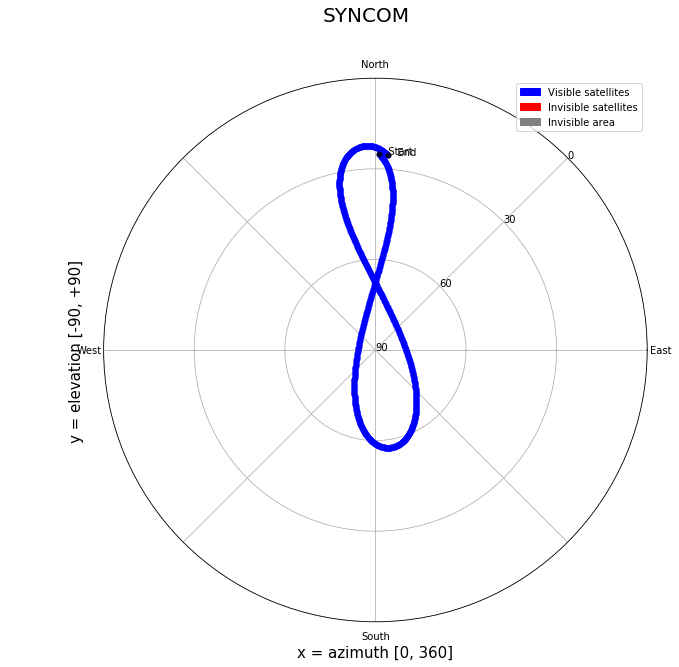

,Azimuth,Elevation,Date
0,$1.09,$25.10,2018-10-24 00:00:00+00:00
1,$1.19,$25.21,2018-10-24 00:01:26+00:00
2,$1.28,$25.32,2018-10-24 00:02:52+00:00
3,$1.38,$25.43,2018-10-24 00:04:18+00:00
4,$1.48,$25.54,2018-10-24 00:05:44+00:00


In [18]:
SYNCOM_tle = '1 00553U 63004  A 87069.11186343  .00000059 +00000-0 +00000-0 0 00011', '2 00553 033.5060 020.0499 0337500 270.6299 085.5000 01.00948389000100'



start = datetime(year=2018,
                 month=10,
                 day=24,
                 hour=0,
                 minute=0,
                 second=0,
                 tzinfo=timezone.utc)

end = datetime(year=2018,
                 month=10,
                 day=25,
                 hour=0,
                 minute=0,
                 second=0,
                 tzinfo=timezone.utc)

plot_sat('SYNCOM',
         *SYNCOM_tle,
         -15.995,
         -48.047,
         1201,
         start=start,
         end=end)

Step = 1
plotted points between [2018-10-26 19:34:00+00:00] and [2018-10-26 19:46:00+00:00].
xy = (0.7853981633974483, 90.0)
xy = (0.7853981633974483, 60.0)
xy = (0.7853981633974483, 30.0)
xy = (0.7853981633974483, 0.0)
xy = (0.7853981633974483, 120.0)


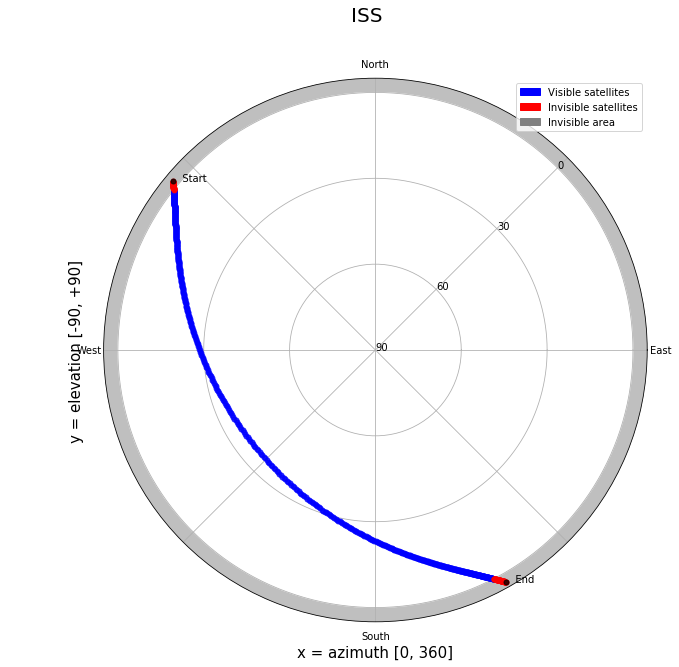

,Azimuth,Elevation,Date
0,$309.81,$-2.09,2018-10-26 19:34:00+00:00
1,$309.78,$-2.03,2018-10-26 19:34:01+00:00
2,$309.74,$-1.98,2018-10-26 19:34:02+00:00
3,$309.71,$-1.92,2018-10-26 19:34:03+00:00
4,$309.67,$-1.86,2018-10-26 19:34:04+00:00


In [19]:
iss_tle = '1 25544U 98067A   18298.51635846  .00001514  00000-0  30392-4 0  9998', '2 25544  51.6406  89.2479 0003892 336.3122 134.3245 15.53861856138782'

start = datetime(year=2018,
                 month=10,
                 day=26,
                 hour=19,
                 minute=34,
                 second=0,
                 tzinfo=timezone.utc)

end = start + timedelta(minutes=12)

plot_sat('ISS',
         *iss_tle,
         -15.995,
         -48.044411,
         500,
         start=start,
         end=end)